In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Necessary imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cd /content/drive/MyDrive/brain-tumor-project/brain tumor dataset

/content/drive/.shortcut-targets-by-id/1X1BcRNDaJyAxglXvQMZj7pGW09z7K_ME/brain tumor dataset


# Let's visualize the data.

In [ ]:
data_dir = ('Training')
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) 

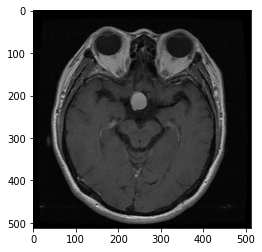

In [ ]:
plt.imshow(img_array);

In [ ]:
# The image shape.
img_array.shape

(512, 512, 3)

#### Ploting a image of each brain tumor type

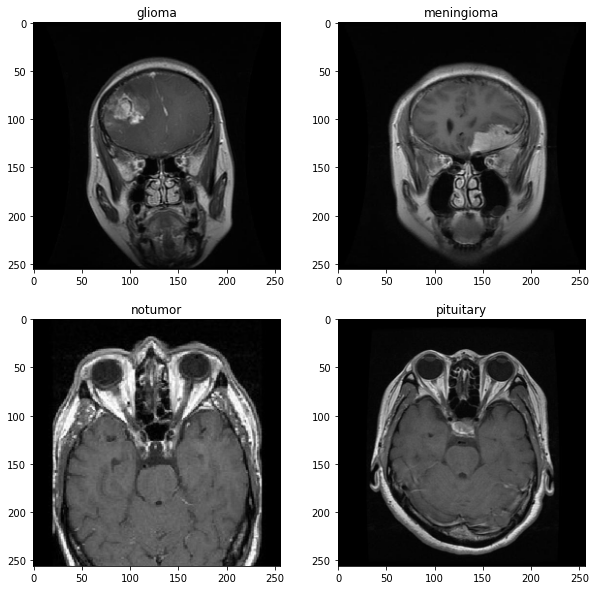

In [ ]:
plt.figure(figsize=(10, 10))

images_path = ['/glioma/Tr-glTr_0000.jpg', '/meningioma/Tr-meTr_0000.jpg', '/notumor/Tr-noTr_0000.jpg', '/pituitary/Tr-piTr_0000.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + images_path[i])
    img = cv2.resize(img, (256, 256))
    plt.imshow(img)
    plt.title(categories[i])

# Modelling


# CNN - Model

In [ ]:
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(64,(7,7), input_shape=(128, 128, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Full connect layers

model.add(Dense(units= 1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, activation='softmax'))



model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['accuracy',keras.metrics.Precision(), keras.metrics.Recall(), 
                             keras.metrics.SpecificityAtSensitivity(0.5), keras.metrics.SensitivityAtSpecificity(0.5)])


In [ ]:
# using the ImageDataGenerator to prepare the images (Resize, nomalize, etc)

generator_train = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.15,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False) 

generator_test = ImageDataGenerator(rescale=1./255,
                                  )

# Creating the train and test data.

train = generator_train.flow_from_directory('Training', target_size=(128,128),subset="training",
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

val = generator_train.flow_from_directory('Training', target_size=(128,128),subset="validation",
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('Testing', target_size=(128,128),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale', shuffle="False")

Found 5368 images belonging to 4 classes.
Found 945 images belonging to 4 classes.
Found 720 images belonging to 4 classes.
